In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("cardio_train.csv", sep=";")

Innan de olika maskininlärningsmodellerna kördes, rensades många uppenbart felaktiga värden bort. Vid tveksamhet om ett värdes rimlighet valdes i allmänhet att rensa bort det, då datasetet var mycket stort, och inte skulle påverkas alltför mycket av några bortrensade värden.

Efter att ha konstaterat en tydlig avgränsning av åldrarna vid den nedre gränsen 14 000 dagar, rensades alla personer med färre dagar ut, då de troligen var felregistrerade. Detta rörde sig bara om ett fåtal personer.

In [3]:
df=df[df["age"]>14000]

Något svårare var det att göra en rimlig avgränsning av längd respektive vikt hos personerna i undersökningen. Det var rimligt att anta att det bland personer med kroppsvikt kring 40 kg fanns såväl felregistrerade som korrekta viktangivelser. Vikter mellan 40 och 50 kg är inte orimliga, medan det är ytterst ovanligt att vuxna människor väger under 40 kg. Ett tydligt "hopp" mellan 39 och 40 kg kunde också utläsas i histogrammet bland dem med låg vikt, och det beslöts därför att sätta den nedre gränsen för vikt till 40 kg. Alla personer med lägre vikt rensades alltså bort.

Liknande svårigheter uppstod i fallet med kroppslängder. Det konstaterades att det stora antalet kortväxta personer troligen beror på att de har råkat bli angivna i tum istället för centimeter. Med risk för att rensa ut en och annan verklig kortväxt person, sattes den nedre gränsen till 140 cm, med stöd av histogrammet över de kortväxta personerna. Den ytterligare gallring som skedde i samband med att orimliga BMI rensades ut, gjorde att även några personer i intervallet 140-150 cm senare rensades bort. Även personer längre än 220 cm rensades bort, vilket rörde sig om en enda datapost.

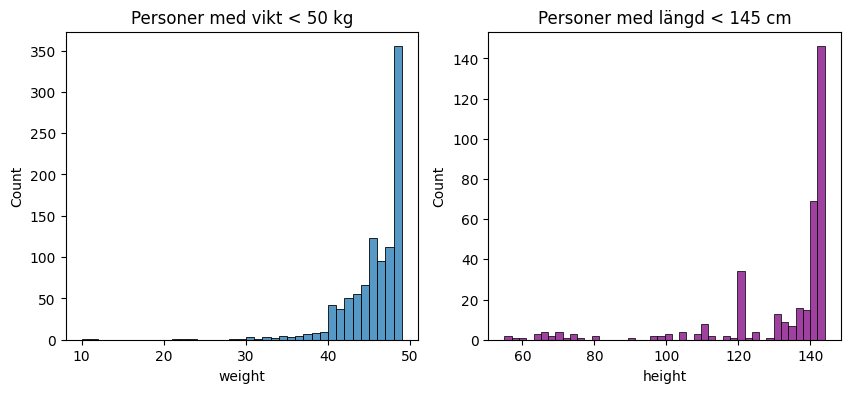

In [13]:
fig, ax=plt.subplots(1, 2, figsize=(10,4))
sns.histplot(data=df[df["weight"]<50]["weight"], binwidth=1, ax=ax[0]).set(title="Personer med vikt < 50 kg");
sns.histplot(data=df[df["height"]<145]["height"], binwidth=2, ax=ax[1], color="purple").set(title="Personer med längd < 145 cm");

In [23]:
df=df[(df["weight"]>=40) & (df["height"]>=140) & (df["height"]<240)]


Samtliga personers BMI beräknades och sparades i en ny kolumn, enligt formeln
$$BMI=\frac{vikt}{längd^2}$$
där vikten är angiven i kilogram, och längden i meter. Ett BMI-värde lägre än 18.5 innebär att man är underviktig, och man kan kraftigt ifrågasätta rimligheten hos BMI-värden under 15. Efter en analys av var och en av personerna med de lägsta BMI-värdena, beslöts att sätta den nedre gränsen för BMI till 15.5. Alla poster med lägre BMI rensades alltså bort.

In [27]:
df["BMI"]=df["weight"]/np.square(df["height"]/100)
df.sort_values("BMI", inplace=True)
df.head(25)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
9487,13518,20958,2,172,40.0,140,90,1,2,0,0,1,1,13.520822
32608,46562,19007,1,176,45.0,120,79,3,3,0,0,1,1,14.527376
16225,23181,19621,1,196,56.0,125,80,1,1,0,0,1,0,14.577259
34585,49400,14643,2,185,50.0,110,70,1,2,0,0,1,0,14.609204
16966,24244,21860,1,165,40.0,90,60,2,1,0,0,1,1,14.692378
28169,40266,18005,1,167,41.0,100,60,2,1,0,0,1,0,14.701137
5362,7634,16755,1,167,41.0,110,80,1,1,0,0,1,0,14.701137
42835,61193,18964,1,173,44.0,120,80,1,1,0,0,1,0,14.701460
22307,31869,21228,1,169,42.0,150,90,2,2,0,0,0,0,14.705367
63154,90183,22192,2,198,58.0,110,70,1,1,0,0,0,0,14.794409


När det gäller höga BMI-värden var det svårare att dra någon tydlig gräns för vad som var rimligt. Att det bland 70 000 människor förekommer ett fåtal med kroppsvikter på 150-200 kg är inte orimligt, och kan vara av stor vikt vid en undersökning av just hjärtsjukdomar. Å andra sidan vore det olyckligt om felaktiga slutsatser drogs om hjärtsjukdomar för kraftigt överviktiga, på grund av felaktigt registrerade personer.

Ett histogram över personer med BMI över 40 ger något som kan linkas vid en exponentiellt avtagande fördelning, men ingen tydlig gräns mellan vad som kan vara rimligt och orimligt, utan snarare ett slags kontinuum. Detta talar för att värdena faktiskt kan vara helt korrekta, och det beslöts därför att behålla alla värden under 70, det vill säga inte rensa bort några poster alls förutom de som rensades bort i samband med längd- och vikt-analysen.

In [32]:
df.tail(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
64661,92301,21705,1,169,172.0,120,70,2,1,0,0,1,0,60.221981
14675,20970,21135,1,159,153.0,120,80,1,1,0,0,1,1,60.519758
42445,60631,19450,1,160,155.0,120,80,1,1,0,0,1,1,60.546875
63937,91284,21115,1,164,164.0,120,80,1,1,0,0,1,0,60.975610
41844,59768,20464,1,164,164.0,140,90,3,3,0,0,1,1,60.975610
46573,66494,20453,1,160,158.0,150,90,1,1,0,0,1,1,61.718750
19579,27962,23193,1,162,162.0,150,90,1,1,0,0,1,1,61.728395
50413,71945,15117,2,180,200.0,150,90,1,1,0,0,1,1,61.728395
389,552,16718,2,165,169.0,120,80,1,1,0,0,1,0,62.075298
3413,4825,14585,1,159,159.0,100,80,1,1,0,0,1,0,62.893082


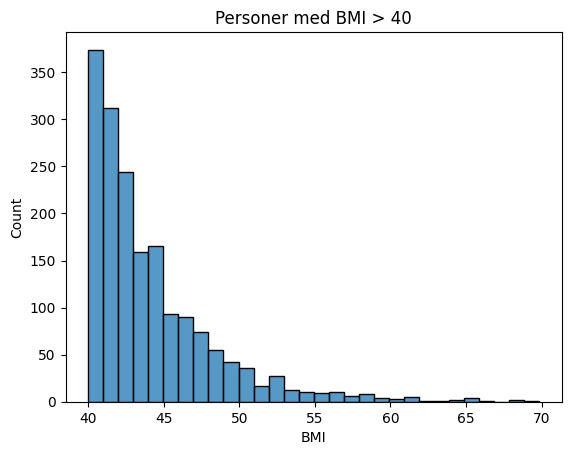

In [35]:
sns.histplot(df[df["BMI"]>40]["BMI"], binwidth=1).set(title="Personer med BMI > 40");

Ett histogram över alla personers BMI ritades, efter att utrensningen gjorts. Antalet personer med BMI > 60 befanns vara försvinnande litet i förhållande till resten av datasetet.

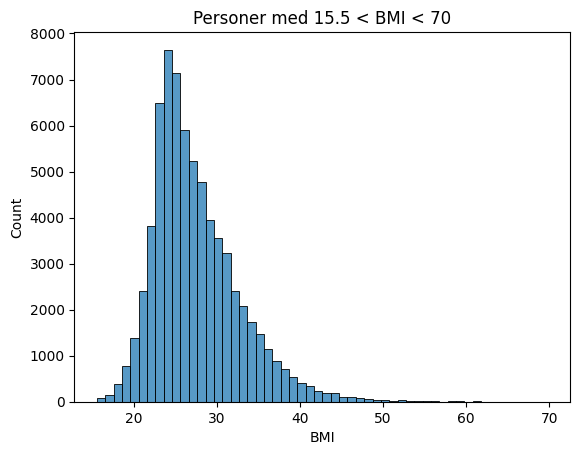

In [36]:
df=df[(df["BMI"]>15.5) & (df["BMI"]<70)]
sns.histplot(df["BMI"], binwidth=1).set(title="Personer med 15.5 < BMI < 70");

BMI-värdena omvandlades därefter till en kategorisk variabel:
- 1 = *normal weight* BMI < 25 (här ingår även underviktiga)
- 2 = *overweight* 25 $<=$ 56

In [ ]:
def obesity(x):
    if x < 25:
        return 1
    elif x < 30:
        return 2
    elif x < 35:
        return 3
    elif x < 40:
        return 4
    else:
        return 5
    
df["Obesity"]=df["BMI"].apply(obesity)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Obesity
58200,83048,22544,1,169,35.0,140,90,2,1,0,0,1,1,12.254473,1
16322,23318,21872,1,165,35.0,100,70,1,1,0,0,1,0,12.855831,1
38417,54851,21809,1,154,32.0,110,60,1,1,0,0,1,0,13.493001,1
9487,13518,20958,2,172,40.0,140,90,1,2,0,0,1,1,13.520822,1
10447,14908,22007,1,162,38.0,100,70,1,1,0,0,1,0,14.479500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,4672,17545,1,155,155.0,160,1000,1,1,0,0,1,1,64.516129,5
2458,3470,23646,2,159,165.0,130,70,1,1,0,0,0,0,65.266406,5
63687,90930,23483,1,154,155.0,170,80,2,1,0,0,1,0,65.356721,5
20092,28683,20656,2,165,178.0,120,80,1,1,1,1,1,0,65.381084,5


In [10]:
# källa: https://stackoverflow.com/questions/62063745/moving-dataframes-between-notebooks
%store df   


Stored 'df' (DataFrame)
